In [1]:
# 이 셀은 VSCode 환경 사용시에만 실행할 것!
%cd ..

c:\Users\jeong\Desktop\space-decomposition


In [8]:
import os
import cv2
import torch
import numpy as np
import pytorch_lightning as pl
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch import nn
from typing import Tuple
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from PIL import Image, ImageDraw
from typing import get_type_hints

from src.datasets import WiderPerson

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.ToTensor(),
    # transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5]),
])
datasets = {x: WiderPerson("D:\\datasets\\WiderPerson", split=x, transform=transform) for x in ["train", "val"]}

In [4]:
def visualize_sample(sample):
    image, target = sample
    draw = ImageDraw.Draw(image)
    for t in target:
        xy1 = np.array(t[1:3]) * image.size
        xy2 = np.array(t[3:]) * image.size
        xyxy = tuple(xy1) + tuple(xy2)
        draw.rectangle(xyxy, outline="black")
    print(image.size)
    plt.imshow(image)

(224, 224)


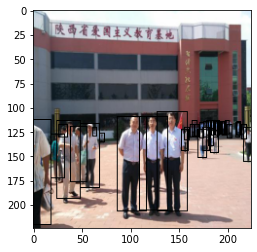

In [5]:
visualize_sample(datasets['train'][0])

In [13]:
get_type_hints(datasets['train'].__getitem__)

{'idx': int,
 'return': typing.Tuple[PIL.Image.Image, typing.List[typing.Tuple[float, float, float, float]]]}